<a href="https://colab.research.google.com/github/acse-2020/acse2020-acse9-finalreport-acse-jaq15/blob/main/example_notebooks/Trained_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

The cells below handle all the necessary imports to run our models, making use of the public repo feeder_repo, linked <!-- [Text](link) -->
[here](https://github.com/acse-jaq15/feeder_repo).

In [1]:
# clone the feeder repo to get data_reader module and financial time series data
!git clone https://github.com/acse-jaq15/feeder_repo.git

Cloning into 'feeder_repo'...
remote: Enumerating objects: 917, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 917 (delta 83), reused 179 (delta 81), pack-reused 736
Receiving objects: 100% (917/917), 291.80 MiB | 26.19 MiB/s, done.
Resolving deltas: 100% (419/419), done.
Checking out files: 100% (546/546), done.


In [2]:
# using '%' to enforce a permanent change of directory
%cd feeder_repo/

/content/feeder_repo


In [3]:
# checking contents listed correctly, should read:
# baseline_model.py data data_reader.py model_loader.py saved_models
# data LICENSE README.md security_plotter.py
!ls

base_model.py  data_reader.py  model_loader.py	saved_models
data	       LICENSE	       README.md	security_plotter.py


In [4]:
import os
import sys
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras import backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [5]:
# appending path with 'feeder_repo' string
sys.path.append('feeder_repo')

# import Data_Reader class from data_reader module
from feeder_repo.data_reader import Data_Reader
# import Baseline_Model class from base_model module
from feeder_repo.base_model import Base_Model
# import Security_Plotter class from security_plotter module
from feeder_repo.security_plotter import Security_Plotter
# import Trained_Model class from model_loader module
from feeder_repo.model_loader import Trained_Model
# import Untrained_Model class from model_loader module
from feeder_repo.model_loader import Untrained_Model

In [6]:
# checking if the notebook is running on a GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
    print('and then re-execute this cell.')
else:
    print(gpu_info)

Wed Jul 28 19:57:39 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------


# Handling the data
Here the Data_Reader class is used to read the time series data and extract training, test and validation sets, along with the relevant X and y values.

In [7]:
# storing the file to be read as a string
in_str = 'Nvidia'
# storing the year of the time series to be used as test data
in_yr = 2019
# creating a variable to store the model name
model_str = 'MLP'
# setting our window_length to be 30 days
window_len = 30

In [8]:
# creating an instance of Data_Reader class
in_data = Data_Reader(in_str, in_yr)
# calling class method extract_train_test to generate training and test datasets
in_data.extract_train_test()
# calling class method extract_xy to generate X and y training and test datasets
in_data.extract_xy(window_len)

# assigning X_train and y_train
X_train = in_data.X_train
y_train = in_data.y_train

# assigning X_test and y_test
X_test = in_data.X_test
y_test = in_data.y_test

# assigning X_val_train and y_val_train
X_val_train = in_data.X_val_train
y_val_train = in_data.y_val_train

# assigning X_val_test and y_val_test
X_val_test = in_data.X_val_test
y_val_test = in_data.y_val_test

# Loading and training a previously saved trained model
A simple call to the Trained_Model class is all that is needed to load a pre-trained model, saved from the code run in the 'notebooks/' directory

In [9]:
# a single call to the Trained_Model class and the saved model is loaded
trained_model = Trained_Model(model_str, in_str)

In [10]:
# training the loaded model
trained_model.train(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
39/39 [==============================] - 12s 4ms/step - loss: 0.0094
Epoch 2/10
39/39 [==============================] - 0s 3ms/step - loss: 6.4369e-04
Epoch 3/10
39/39 [==============================] - 0s 3ms/step - loss: 3.8592e-04
Epoch 4/10
39/39 [==============================] - 0s 3ms/step - loss: 5.0051e-04
Epoch 5/10
39/39 [==============================] - 0s 4ms/step - loss: 4.4906e-04
Epoch 6/10
39/39 [==============================] - 0s 3ms/step - loss: 4.5086e-04
Epoch 7/10
39/39 [==============================] - 0s 3ms/step - loss: 3.8309e-04
Epoch 8/10
39/39 [==============================] - 0s 3ms/step - loss: 2.9973e-04
Epoch 9/10
39/39 [==============================] - 0s 3ms/step - loss: 4.0185e-04
Epoch 10/10
39/39 [==============================] - 0s 3ms/step - loss: 3.3285e-04


In [11]:
# a quick evaluation of the results of extra training
mse, rmse, mae = trained_model.evaluate(X_test, y_test)
print('Mean squared error: ',mse,'\nRoot Mean Squared Error: ',rmse,'\nMean absolute error: ',mae)

Mean squared error:  0.0016997300535250186 
Root Mean Squared Error:  0.0412277825443598 
Mean absolute error:  0.03175209805636783


In [12]:
# gathering the information needed to plot
# creating an instance of Baseline_Model class using X_test
base_model = Base_Model(X_test, window_len)
# calling predict_y method
base_model.predict_y(in_data.test_len - window_len)

# using the model to predict y from X_test
y_pred = trained_model.model.predict(X_test)
# assigning y_dummy variable to .y_pred class attribute
y_dummy = base_model.y_pred

# calling class method extract_real_price to generate unnormalised prices
in_data.extract_real_prices(y_pred, y_dummy)

# assinging y_true variable
y_true = in_data.y_true

# assigning actual_price, predicted_price and dummy_price
actual_price = in_data.actual_price
predicted_price = in_data.predicted_price
dummy_price = in_data.dummy_price

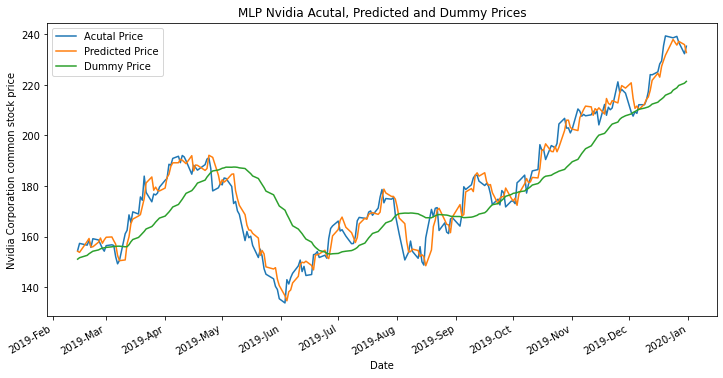

In [13]:
plotter = Security_Plotter(in_data, actual_price, predicted_price,
                            dummy_price, in_data.train_len, window_len, in_str, model_str)

plotter.single_plot()